In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [10]:
# Importing dataset
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [11]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [13]:
print('训练数据: \nRows: {} Columns: {}'.format(train.shape[0], train.shape[1]))

训练数据: 
Rows: 550068 Columns: 12


In [14]:
print('测试数据: \nRows: {} Columns: {}'.format(test.shape[0], test.shape[1]))

测试数据: 
Rows: 233599 Columns: 11


## 单变量分析

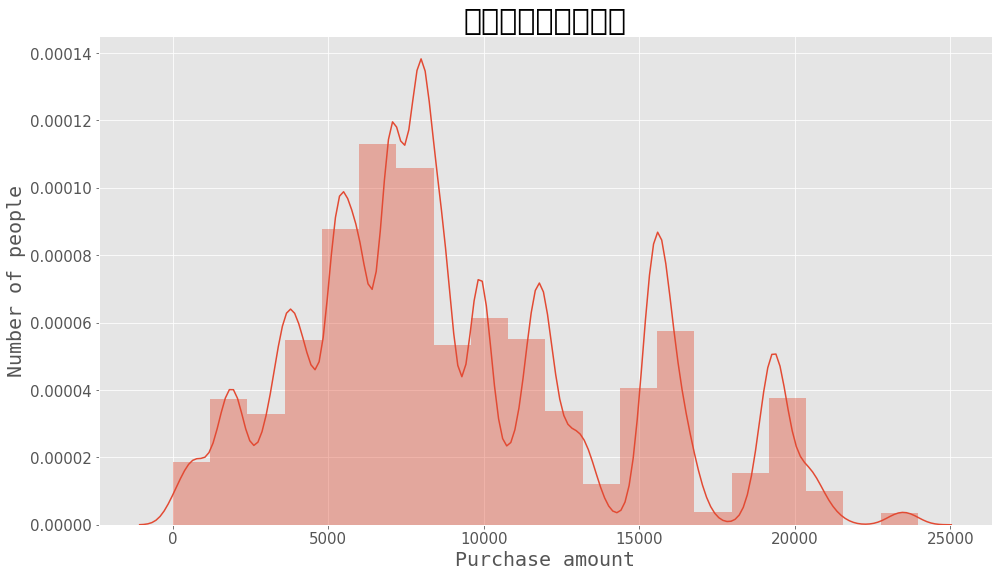

In [15]:
plt.style.use('ggplot')
plt.figure(figsize = (16, 9))
sns.distplot(train['Purchase'], bins = 20)
plt.title('购买金额的人数趋势', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.show()

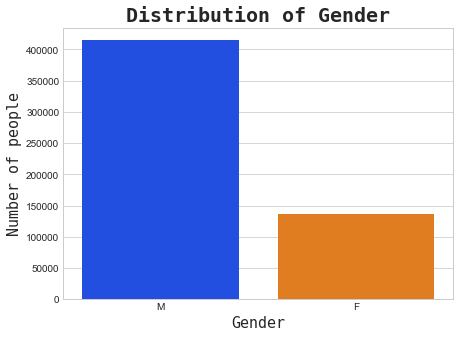

In [16]:
gen = train['Gender'].value_counts()
# gen
plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(gen.index, gen.values, palette = 'bright')
plt.title('Distribution of Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

In [17]:
# # Creating a pie chart for 'City Category'
# city = train['City_Category'].value_counts()

# plt.style.use('seaborn')
# plt.figure(figsize = (20, 10))
# plt.pie(city.values, labels = city.index, startangle = 30, explode = (0 , 0.20, 0), shadow = True, autopct = '%1.1f%%')
# plt.title('City category distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
# plt.legend()
# plt.legend(prop = {'size' : 20})
# plt.axis('equal')
# plt.show()

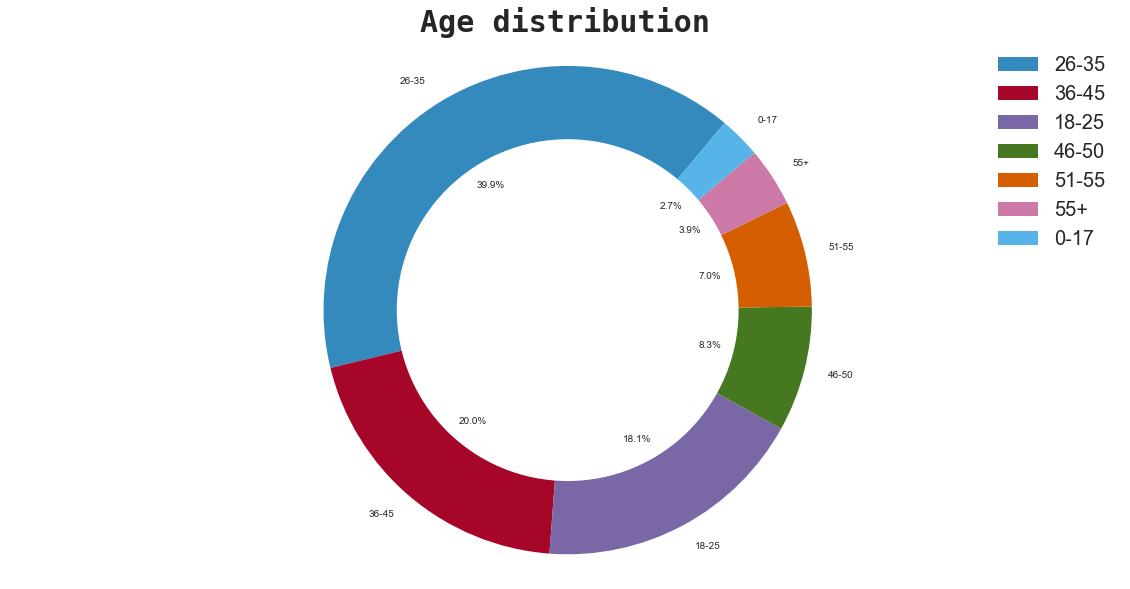

In [18]:
# Creating a donut chart for 'Age'
age = train['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (20, 10))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis('equal')
plt.legend(prop = {'size' : 20})
plt.show()

In [19]:
# # Creating a barplot for 'Occupation'
# occupation = train['Occupation'].value_counts()

# plt.figure(figsize = (16, 9))
# plt.style.use('seaborn-whitegrid')
# sns.barplot(occupation.index, occupation.values, palette = 'Paired')
# plt.title('Occupation wise Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
# plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
# plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
# plt.tick_params(labelsize = 20)
# plt.show()

In [20]:
# # Creating a countplot for 'Marital Status'
# plt.style.use('seaborn')
# plt.figure(figsize = (7, 5))
# sns.countplot(train['Marital_Status'])
# plt.title('Marital Status Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
# plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
# plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
# plt.tick_params(labelsize = 10)
# plt.show()

## 双变量分析

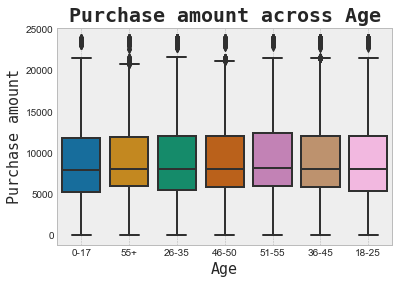

In [21]:
# Creating a boxplot of 'Age vs Purchase'
plt.style.use('bmh')
sns.boxplot(train['Age'], train['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.grid()
plt.show()

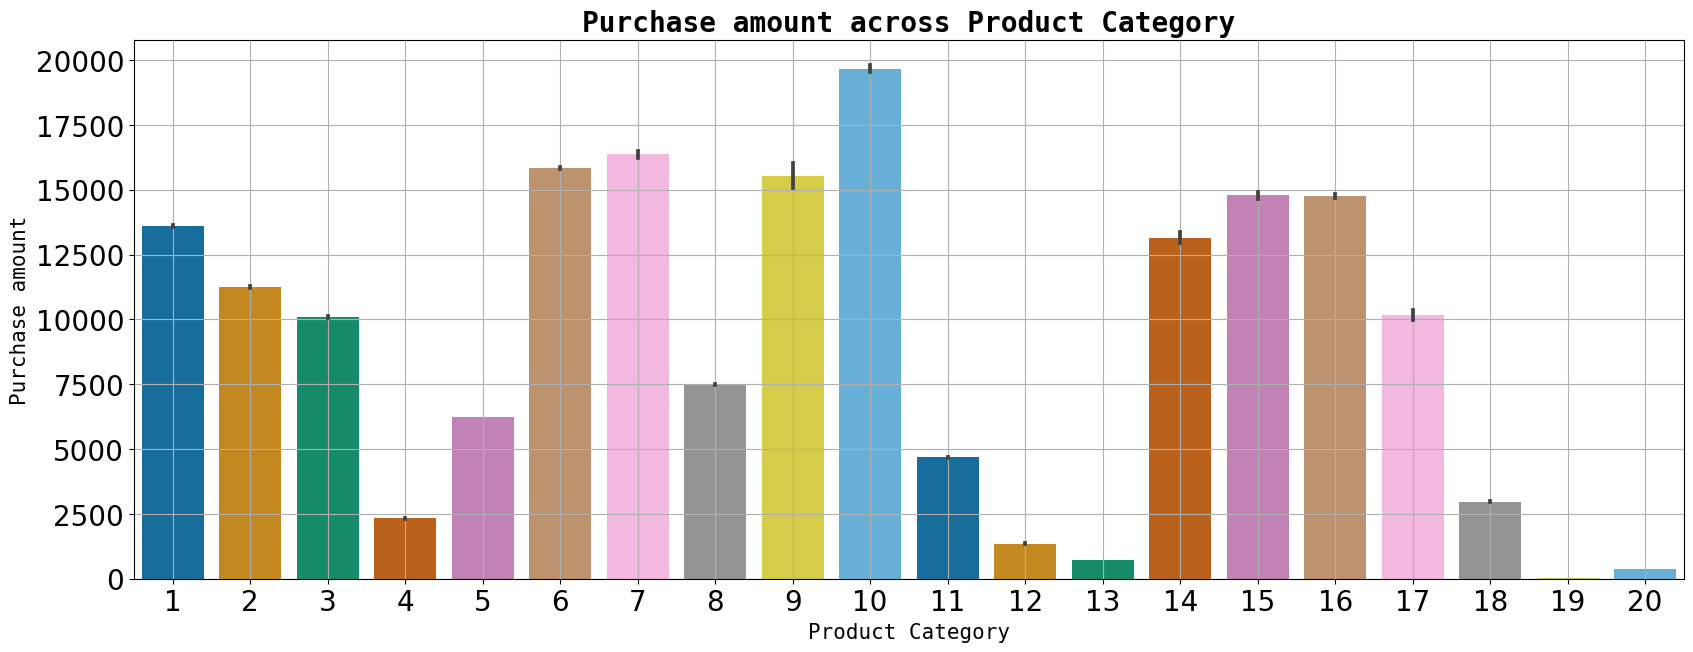

In [22]:
# Creating a barplot of 'Product_Category_1 vs Purchase'
plt.style.use('default')
plt.figure(figsize = (20, 7))
sns.barplot(train['Product_Category_1'], train['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 20)
plt.grid()
plt.show()

## 多变量分析

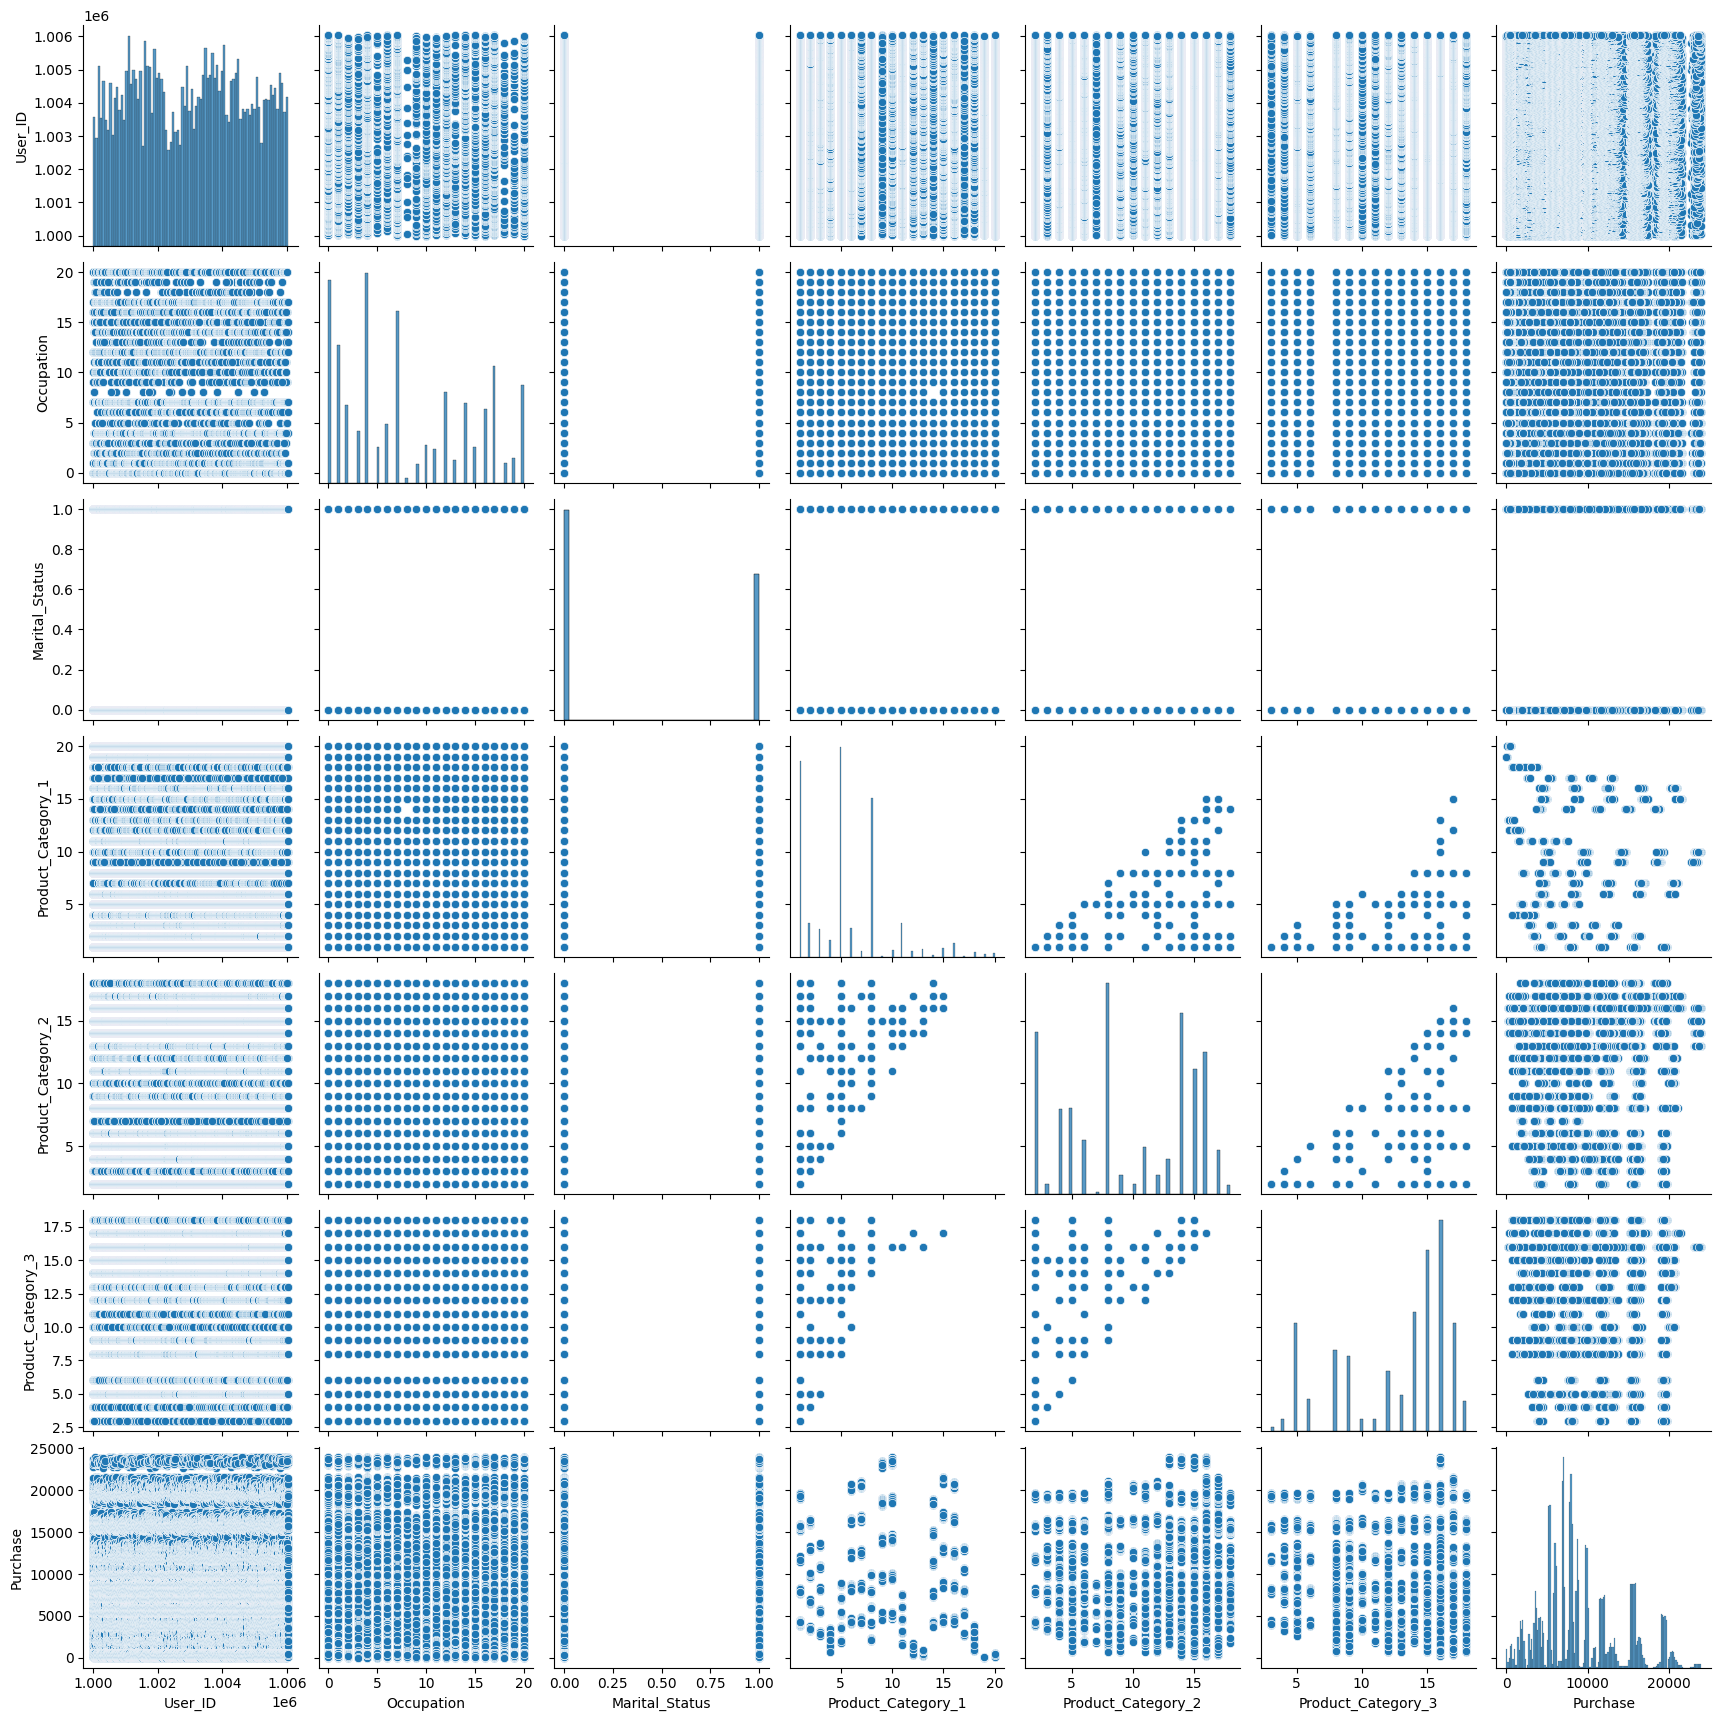

In [15]:
# Creating a Pairplot for all features
# plt.style.use('default')
sns.pairplot(train)
plt.show()

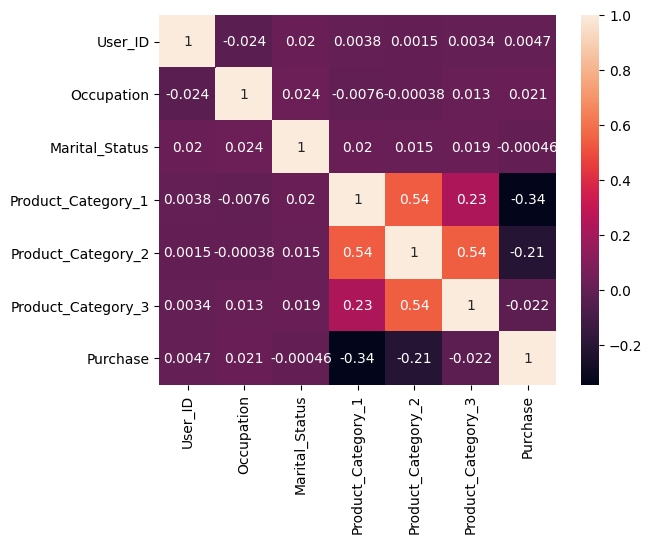

In [16]:
# Creating a heatmap of correlation matrix
sns.heatmap(train.corr(), annot = True)
plt.show()

## 特征工程

In [17]:
train['source'] = 'train'
test['source'] = 'test'

In [18]:
dataset = pd.concat([train, test])
dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,test
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,test
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,test
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,test


In [19]:
dataset['Age'] = dataset['Age'].apply(lambda x : str(x).replace('55+', '55'))
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

In [20]:
dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55,16,C,4,0,8,NaN,NaN,7969.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4,1,8,NaN,NaN,NaN,test
233595,1006036,P00254642,F,26-35,15,B,4,1,5,8.0,NaN,NaN,test
233596,1006036,P00031842,F,26-35,15,B,4,1,1,5.0,12.0,NaN,test
233597,1006037,P00124742,F,46-50,1,C,4,0,10,16.0,NaN,NaN,test


In [21]:
dataset.drop('Product_Category_3', axis = 1, inplace = True)

In [22]:
dataset.drop('User_ID', axis = 1, inplace = True)

In [23]:
dataset.drop('Product_ID', axis = 1, inplace = True)

### 特征编码

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
label_encoder_gender = LabelEncoder()
dataset['Gender'] = label_encoder_gender.fit_transform(dataset['Gender'])

In [26]:
label_encoder_age = LabelEncoder()
dataset['Age'] = label_encoder_age.fit_transform(dataset['Age'])

In [27]:
label_encoder_city = LabelEncoder()
dataset['City_Category'] = label_encoder_city.fit_transform(dataset['City_Category'])

### 缺失处理

In [28]:
dataset['Product_Category_2'].fillna(dataset['Product_Category_2'].median(), inplace = True)

In [29]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].astype('int')

### 数据划分

In [30]:
train = dataset.loc[dataset['source'] == 'train']
test = dataset.loc[dataset['source'] == 'test']

In [31]:
train.drop('source', axis = 1, inplace = True)
test.drop('source', axis = 1, inplace = True)

In [32]:
X = train.drop("Purchase", axis = 1)
Y = train["Purchase"]

### 特征选择

In [33]:
# from sklearn.ensemble import ExtraTreesRegressor
# selector = ExtraTreesRegressor()

In [34]:
# selector.fit(X, Y)

In [35]:
# feature_imp = selector.feature_importances_
# feature_imp # Gender City_Category  Marital_Status

In [36]:
# X.drop(['Gender', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)

### 特征缩放

In [37]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [38]:
# for col in X.columns:
#     X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### 数据分割

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [40]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (440054, 8)
X_test shape: (110014, 8)
Y_train shape: (440054,)
Y_test shape: (110014,)


## 建模

In [41]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [42]:
lin_reg.fit(X, Y)

LinearRegression()

In [43]:
Y_pred_lin_reg = lin_reg.predict(X_test)

## 检测

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_lin_reg)))

Linear Regression: 
RMSE: 4686.620793639543


## 高效率版本

In [1]:
import turicreate as tc

In [2]:
train = tc.SFrame.read_csv('data/train.csv')
test = tc.SFrame.read_csv('data/test.csv')

Finished parsing file /Users/wangweida/Desktop/Desktop-MacBook/銷售預測/data/train.csv

Parsing completed. Parsed 100 lines in 0.608086 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,int,str,str,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/wangweida/Desktop/Desktop-MacBook/銷售預測/data/train.csv

Parsing completed. Parsed 550068 lines in 0.741724 secs.

Finished parsing file /Users/wangweida/Desktop/Desktop-MacBook/銷售預測/data/test.csv

Parsing completed. Parsed 100 lines in 0.236255 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,int,str,str,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/wangweida/Desktop/Desktop-MacBook/銷售預測/data/test.csv

Parsing completed. Parsed 233599 lines in 0.28885 secs.

In [3]:
tc.visualization.histogram(train["Purchase"])

Materializing SArray

In [4]:
train["Product_Category_1"] = train["Product_Category_1"].fillna(train["Product_Category_1"].median())
train["Product_Category_2"] = train["Product_Category_2"].fillna(train["Product_Category_2"].median())

In [5]:
example_features = ['Product_Category_1', "Product_Category_2"]
example_model = tc.linear_regression.create(train, target = 'Purchase', 
                                                    features = example_features, 
                                                    validation_set = "auto")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 522564

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.042633     | 16986.332562       | 16930.311428         | 4710.225219                     | 4737.093110                       |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [6]:
example_model.coefficients

name,index,value,stderr
(intercept),None,12073.240999284015,16.701255518558
Product_Category_1,None,-418.7235428318036,1.7545328210364273
Product_Category_2,None,-57.02113329516006,1.6344223673645097
